In [1]:
from dataclasses import dataclass
from PIL import Image, ImageDraw
from typing import List

### Global ###
dimensions: (600, 337), n_rectangles: 2, padding_horizontal: 20, padding_vertical: 16
centers: [150, 450], rectangle_width: 280, rectangle_half_width: 140, rectangle_height: 33

### Individual ###
--- rectangles ---
rectangle 0: (10, 16, 290, 49)
rectangle 1: (310, 16, 590, 49)
--- triangles ---
centers: 5


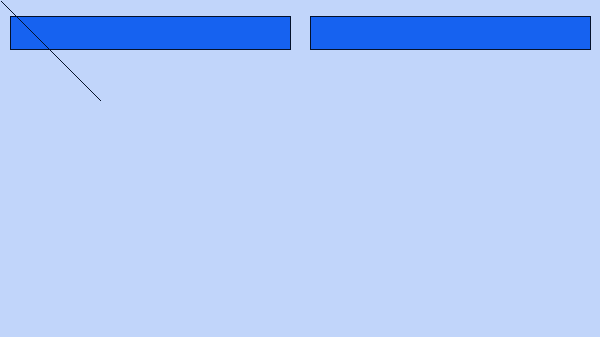

In [2]:
def draw_case(n_rectangles: dict[int, int] = {1, 1},
              triangles: List[int] = {0: 3},
              background_size: (int, int) = [],
              width: int = 600,
              aspect_ratio: str = 'widescreen',
              background_color: str ='#c1d5fa',
              rectangle_color: str ='#1662f0',      
              rectangle_outline_color: str ='#04112a',                      
              rectangles: list[int] = [1],
              min_rectangle_width: int = 10,
              percent_of_height_for_rectangle_height: float = 0.10,
              percent_of_width_for_padding_horizontal: float = 0.10,
              percent_of_heigth_for_padding_vertical: float = 0.05
              ) -> None: 
    
    # dimensions
    aspect_ratios = {'standard': 4/3, 'widescreen': 16/9}
    if not background_size:
        width = width
        height = int(width/aspect_ratios[aspect_ratio])
        background_size = (width, height)
        
    # draw background
    im = Image.new(mode='RGB', size=background_size, color=background_color)
    draw = ImageDraw.Draw(im)

    # rectangles
    n_rectangles = len(rectangles)
    centers_rectangles=[int(width/(2*n_rectangles))*(1+2*i) for i in range(n_rectangles)]
    ## padding, horizontal, between the edges and recatngles, and between the rectangles themselves
    padding_horizontal = width*percent_of_width_for_padding_horizontal/(n_rectangles+1)
    if padding_horizontal > 1:
        padding_horizontal = int(padding_horizontal)
    else: 
        padding_horizontal = 1
    ## padding, vertical
    padding_vertical = int(percent_of_heigth_for_padding_vertical*height)
    ## width of each rectangle
    rectangle_width = int(width/n_rectangles)-2*int(padding_horizontal/2)
    if rectangle_width < min_rectangle_width:
        rectangle_width = min_rectangle_width
    rectangle_half_width = int(rectangle_width/2)
    ## rectangle height
    rectangle_height = int(percent_of_height_for_rectangle_height*height)
    ## check
    print(f'### Global ###\ndimensions: ({width}, {height}), n_rectangles: {n_rectangles}, padding_horizontal: {padding_horizontal}, padding_vertical: {padding_vertical}\ncenters: {centers_rectangles}, rectangle_width: {rectangle_width}, rectangle_half_width: {rectangle_half_width}, rectangle_height: {rectangle_height}\n')
    ## draw rectangles
    print(f'### Individual ###\n--- rectangles ---')
    for i_rectangles in range(n_rectangles):
        print(f'rectangle {i_rectangles}: ({centers_rectangles[i_rectangles]-rectangle_half_width}, {padding_vertical}, {centers_rectangles[i_rectangles]+rectangle_half_width}, {padding_vertical+rectangle_height})')
        draw.rectangle([centers_rectangles[i_rectangles]-rectangle_half_width, padding_vertical, centers_rectangles[i_rectangles]+rectangle_half_width, padding_vertical+rectangle_height], fill=rectangle_color, outline=rectangle_outline_color, width=1)

    # triangles
    n_triangles = sum([len(sublist) for sublist in triangles])
    centers_triangles = triangles
    base_triangles = []
    print(f'--- triangles ---\ncenters: {n_triangles}')
    draw.polygon([1,1, 10, 10, 100, 100], fill=rectangle_color, outline=rectangle_outline_color, width=1)
    
    

    # finish
    im.save('image1.jpg')
    display(im)
    
#draw_case(background_size=(200, 50), background_color='red', rectangles=(1, 1))
#draw_case(background_color='grey')
draw_case(rectangles=(1, 1), triangles = [[0.2, 0.45, 0.1], [0.5, 0.25]])

In [3]:
@dataclass
class qroestl_case_problem_image():
    pass    